In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data analysis

In [2]:
PATH = "Bike-Sharing-Dataset/"
#!ls {PATH}

In [3]:
df_raw = pd.read_csv(f'{PATH}/hour.csv')
print(df_raw.head())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


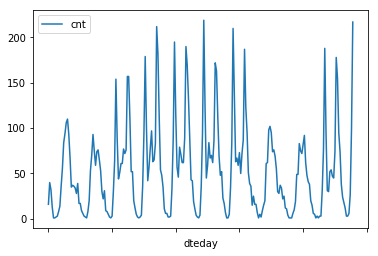

In [4]:
#first 10 days data and bikes rented
df_raw[:24*10].plot(x='dteday', y='cnt')

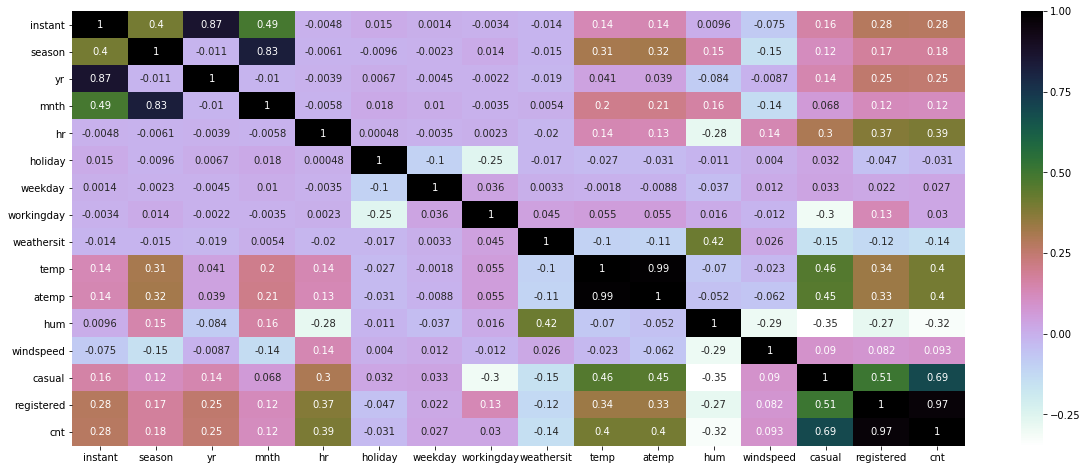

In [5]:
# correlation between features
plt.figure(figsize=(20,8)) 
sns.heatmap(df_raw.corr(),annot=True,cmap='cubehelix_r') 
plt.show()

In [6]:
# Printing the unique values stored by data
col_list = list(df_raw.columns.values)
for i in col_list:
    print(i)
    print(eval("df_raw." + i + ".unique()"))

instant
[    1     2     3 ... 17377 17378 17379]
dteday
['2011-01-01' '2011-01-02' '2011-01-03' '2011-01-04' '2011-01-05'
 '2011-01-06' '2011-01-07' '2011-01-08' '2011-01-09' '2011-01-10'
 '2011-01-11' '2011-01-12' '2011-01-13' '2011-01-14' '2011-01-15'
 '2011-01-16' '2011-01-17' '2011-01-18' '2011-01-19' '2011-01-20'
 '2011-01-21' '2011-01-22' '2011-01-23' '2011-01-24' '2011-01-25'
 '2011-01-26' '2011-01-27' '2011-01-28' '2011-01-29' '2011-01-30'
 '2011-01-31' '2011-02-01' '2011-02-02' '2011-02-03' '2011-02-04'
 '2011-02-05' '2011-02-06' '2011-02-07' '2011-02-08' '2011-02-09'
 '2011-02-10' '2011-02-11' '2011-02-12' '2011-02-13' '2011-02-14'
 '2011-02-15' '2011-02-16' '2011-02-17' '2011-02-18' '2011-02-19'
 '2011-02-20' '2011-02-21' '2011-02-22' '2011-02-23' '2011-02-24'
 '2011-02-25' '2011-02-26' '2011-02-27' '2011-02-28' '2011-03-01'
 '2011-03-02' '2011-03-03' '2011-03-04' '2011-03-05' '2011-03-06'
 '2011-03-07' '2011-03-08' '2011-03-09' '2011-03-10' '2011-03-11'
 '2011-03-12' '2011

# Data Preprocessing

In [7]:
# Presence of null values
df_raw= df_raw.fillna(np.nan)
total = df_raw.isnull().sum().sort_values(ascending=False)

percent = (df_raw.isnull().sum()/df_raw.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
display(missing_data.head(5))

,Total,Percent
cnt,0,0.0
weekday,0,0.0
dteday,0,0.0
season,0,0.0
yr,0,0.0


In [8]:
#Catagorical Variables to one hot encoding
dummy_fields = ['season', 'weathersit', 'mnth', 'hr', 'weekday']
for each in dummy_fields:
    dummies = pd.get_dummies(df_raw[each], prefix=each, drop_first=False)
    df_raw = pd.concat([df_raw, dummies], axis=1)  

df_raw.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,0,0,0,0,0,0,0,0,0,1
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,0,0,0,0,0,0,0,0,0,1
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,0,0,0,0,0,0,0,0,0,1
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,0,0,0,0,0,0,0,0,0,1
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,0,0,0,0,0,0,0,0,0,1


In [9]:
print(df_raw.dtypes)

instant           int64
dteday           object
season            int64
yr                int64
mnth              int64
hr                int64
holiday           int64
weekday           int64
workingday        int64
weathersit        int64
temp            float64
atemp           float64
hum             float64
windspeed       float64
casual            int64
registered        int64
cnt               int64
season_1          uint8
season_2          uint8
season_3          uint8
season_4          uint8
weathersit_1      uint8
weathersit_2      uint8
weathersit_3      uint8
weathersit_4      uint8
mnth_1            uint8
mnth_2            uint8
mnth_3            uint8
mnth_4            uint8
mnth_5            uint8
                 ...   
hr_1              uint8
hr_2              uint8
hr_3              uint8
hr_4              uint8
hr_5              uint8
hr_6              uint8
hr_7              uint8
hr_8              uint8
hr_9              uint8
hr_10             uint8
hr_11           

In [10]:
# dropping 'season', 'weathersit', 'mnth', 'hr', 'weekday'
# as we have created corresponding catagorical variables

# instant as it is like id, 'atemp' as correlation exists between temp and atemp
# 'workingday' as weekday encompasses all the information of it basically (1 or 0)

# 'dteday' because we have feature columns for mnth, hr, day
fields_to_drop = ['instant', 'season', 'weathersit', 'atemp', 'workingday',
                  'weekday', 'mnth', 'hr', 'dteday']
df_raw = df_raw.drop(fields_to_drop, axis=1)
df_raw.head()

,yr,holiday,temp,hum,windspeed,casual,registered,cnt,season_1,season_2,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0.24,0.81,0.0,3,13,16,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0.22,0.80,0.0,8,32,40,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0.22,0.80,0.0,5,27,32,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0.24,0.75,0.0,3,10,13,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0.24,0.75,0.0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1


To make training the network easier, we'll standardize each of the continuous variables. That is, we'll shift and scale the variables such that they have zero mean and a standard deviation of 1.

The scaling factors are saved so we can go backwards when we use the network for predictions.

In [11]:
# Scaling continous features
quant_features = ['casual', 'registered', 'cnt', 'temp', 'hum', 'windspeed']
# Store scalings in a dictionary so we can convert back later
scaled_features = {}
for each in quant_features:
    mean, std = df_raw[each].mean(), df_raw[each].std()
    scaled_features[each] = [mean, std]
    df_raw.loc[:, each] = (df_raw[each] - mean)/std

### Splitting data to train, test and validation set

In [12]:
# Save data for approximately the last 21 days 
test_data = df_raw[-21*24:]
# Now remove the test data from the data set 
df_raw = df_raw[:-21*24]

# Separate the data into features and targets
target_fields = ['cnt', 'casual', 'registered']
features, targets = df_raw.drop(target_fields, axis=1), df_raw[target_fields]
test_features, test_targets = test_data.drop(target_fields, axis=1), test_data[target_fields]

We'll split the data into two sets, one for training and one for validating as the network is being trained. Since this is time series data, we'll train on historical data, then try to predict on future data (the validation set).

In [13]:
# Hold out the last 60 days or so of the remaining data as a validation set
train_features, train_targets = features[:-60*24], targets[:-60*24]
val_features, val_targets = features[-60*24:], targets[-60*24:]

In [14]:
print(train_features.shape)
print(train_targets.shape)
print(len(val_features))
print(len(test_data))

(15435, 56)
(15435, 3)
1440
504


In [15]:
# since we have 3 target column we choose total ie 'cnt' (count)
print(train_targets['cnt'].head())

0   -0.956312
1   -0.823998
2   -0.868103
3   -0.972851
4   -1.039008
Name: cnt, dtype: float64


In [16]:
def MSE(y, Y):
    return np.mean((y-Y)**2)

# MODEL BUILDING

### Random Forrest Regressor using GridCV

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

parameters = {'max_depth':[30, 35, 40, 45]}
regr = RandomForestRegressor(random_state=0, n_estimators=200).fit(train_features, train_targets['cnt'])
clf = GridSearchCV(regr, parameters, cv=5, n_jobs=-1)

/home/sagar/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [18]:
regr.score(train_features,train_targets['cnt'])

0.989746390743675

In [19]:
val_y = regr.predict(val_features)
r2_score(val_targets['cnt'], val_y)

0.8214108916843297

## Neural Network

In [20]:
import sys
from NeuralNet import Network

N_i = train_features.shape[1]


# hyperperemeters of network
iterations = 1000
learning_rate = 0.1
hidden_nodes = 5
output_nodes = 1
network = Network(N_i, hidden_nodes, output_nodes, learning_rate)

losses = {'train':[], 'validation':[]}
for ii in range(iterations):
    # Select and use random 256 records
    batch = np.random.choice(train_features.index, size=128)
    X, y = train_features.iloc[batch].values, train_targets.iloc[batch]['cnt']          
    network.train(X, y)
    
    # Printing out the training progress
    train_loss = MSE(network.run(train_features).T, train_targets['cnt'].values)
    val_loss = MSE(network.run(val_features).T, val_targets['cnt'].values)
    sys.stdout.write("\rProgress: {:2.1f}".format(100 * ii/float(iterations)) \
                     + "% ... Training loss: " + str(train_loss)[:5] \
                     + " ... Validation loss: " + str(val_loss)[:5])
    sys.stdout.flush()
    
    #for graphing training progress
    losses['train'].append(train_loss)
    losses['validation'].append(val_loss)

Progress: 99.9% ... Training loss: 0.312 ... Validation loss: 0.502

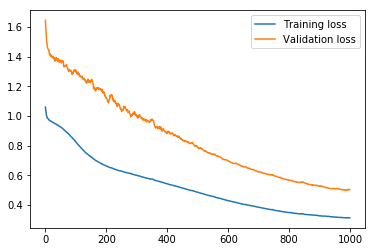

In [21]:
plt.plot(losses['train'], label='Training loss')
plt.plot(losses['validation'], label='Validation loss')
plt.legend()
_ = plt.ylim()